In [311]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import time
import numpy as np
from loguru import logger
import warnings
warnings.filterwarnings("ignore")


csv_eth_slow = '../../Data/rq23/eth_slows.csv'
csv_eth_slowliq = '../../Data/rq23/eth_slowliqui.csv'

df_token = pd.read_csv(csv_eth_slow)
df_liq = pd.read_csv(csv_eth_slowliq)

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

print('Done data loading')

Done data loading


# Scam age stat

In [327]:
ages = []
for outer_index, outer_row in df_token.iterrows():
    #Get owner, verified and unverified token of pool
    pool = outer_row['pool_address']
    owner = outer_row['token_owner']
    utoken= outer_row['token_address']
    vtokenn = outer_row['token_paired_address']

    df_tokenliq_sub = df_liq[df_liq['contract_address'] == pool]
    df_tokenliq_sub.loc[:, 'timestamp'] = pd.to_datetime(df_tokenliq_sub['timestamp'])
    df_tokenliq = df_tokenliq_sub.sort_values(by='timestamp')
    comparison = np.datetime64('2024-07-01T00:00:00')
    last = df_tokenliq.iloc[-1]['timestamp']
    range = df_tokenliq.iloc[-1]['timestamp'] - df_tokenliq.iloc[0]['timestamp']
    ages.append(range.days)
    age = int(range.days)
    if age > 1460:
        live_record[48][0] += 1
        if last > comparison:
            live_record[48][1] += 1
    elif age > 1095:
        live_record[36][0] += 1
        if last > comparison:
            live_record[36][1] += 1
    elif age > 730:
        live_record[24][0] += 1
        if last > comparison:
            live_record[24][1] += 1
    elif age > 365:
        live_record[12][0] += 1
        if last > comparison:
            live_record[12][1] += 1
    elif age > 180:
        live_record[6][0] += 1
        if last > comparison:
            live_record[6][1] += 1
    elif age > 90:
        live_record[3][0] += 1
        if last > comparison:
            live_record[3][1] += 1
    elif age > 60:
        live_record[2][0] += 1
        if last > comparison:
            live_record[2][1] += 1
    elif age > 30:
        live_record[1][0] += 1
        if last > comparison:
            live_record[1][1] += 1
    else:
        live_record[0][0] += 1
        if last > comparison:
            live_record[0][1] += 1

In [ ]:
years = list(live_record.keys())

aa = np.arange(len(years))

In [ ]:
#  Extracting keys, token counts, and alive tokens
years = list(live_record.keys())
tokens = [live_record[year][0] for year in years]
alive_tokens = [live_record[year][1] for year in years]

# Define bar width and positions for bars
bar_width = 0.35
r1 = np.arange(len(years))  # Correctly define r1 as an array using np.arange
r2 = r1 + bar_width  # Shift second bar by bar_width

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(r1, tokens, color='#d3d3d3', width=bar_width, edgecolor='black', linewidth=0.7, label='Total Tokens at Age', zorder=3)
ax.bar(r2, alive_tokens, color='#696969', width=bar_width, edgecolor='black', linewidth=0.7, label='Alive Tokens at Age', zorder=3)

# Labels and grid
ax.set_xlabel('Age of Pool from deployment (month)', fontweight='bold')
ax.set_ylabel('Number of Liquidity Pools', fontweight='bold')
ax.set_title('Token Age and Alive Tokens by Age Group')
ax.set_xticks(r1 + bar_width / 2)
ax.set_xticklabels(years)
ax.grid(True, zorder=1)

# Legend
ax.legend(loc='upper right', prop={'size': 10})

# Show the plot
plt.show()

# Year created

In [324]:
df_draft = df_token.copy()
df_draft['year'] = pd.to_datetime(df_draft['token_created_time']).dt.year
year_counts = df_draft['year'].value_counts()
print(year_counts)

year
2023    979
2022    863
2020    585
2021    446
2024    128
2019     52
2018     41
2017     23
Name: count, dtype: int64


In [ ]:
# Extracting keys, token counts, and alive tokens
years = list(live_record.keys())
tokens = [live_record[year][0] for year in years]
alive_tokens = [live_record[year][1] for year in years]

# Define bar width and positions for bars
bar_width = 0.35
r1 = np.arange(len(years))
r2 = r1 + bar_width  # Shift second bar by bar_width

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(r1, tokens, color='#d3d3d3', width=bar_width, edgecolor='black', linewidth=0.7, label='Total Tokens at Age',zorder = 3)
ax.bar(r2, alive_tokens, color='#696969', width=bar_width, edgecolor='black', linewidth=0.7, label='Alive Tokens at Age',zorder = 3)


# Labels and grid
ax.set_xlabel('Age of Pool from deployment (month)', fontweight='bold')
ax.set_ylabel('Number of Liquidity Pool', fontweight='bold')
ax.set_title('Token Age and Alive Tokens by Age Group')
ax.set_xticks(r1 + bar_width / 2)
ax.set_xticklabels(years)
ax.grid(True, zorder=1)

# Legend
ax.legend(loc='upper right', prop={'size': 10})

# Show the plot
plt.show()

# Toltal volume 

In [82]:
sum = 0
for outer_index, outer_row in df_token.iterrows():
    #Get owner, verified and unverified token of pool
    pool = outer_row['pool_address']
    owner = outer_row['token_owner']
    utoken= outer_row['token_address']
    vtokenn = outer_row['token_paired_address']

    df_tokenliq_sub = df_liq[df_liq['contract_address'] == pool]
    df_tokenliq_sub = df_tokenliq_sub[df_tokenliq_sub['token_address'] == vtokenn]
    df_tokenliq_sub['volume'] = abs(df_tokenliq_sub['amount_token'] * df_tokenliq_sub['token_price'])

    sum += df_tokenliq_sub['volume'].sum()

In [83]:
sum

4494884908.640229

In [ ]:
# Extracting keys, token counts, and alive tokens
years = list(live_record.keys())
tokens = [live_record[year][0] for year in years]
alive_tokens = [live_record[year][1] for year in years]

# Define bar width and positions for bars
bar_width = 0.35
r1 = np.arange(len(years))
r2 = r1 + bar_width  # Shift second bar by bar_width

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(r1, tokens, color='#d3d3d3', width=bar_width, edgecolor='black', linewidth=0.7, label='Total Tokens at Age',zorder = 3)
ax.bar(r2, alive_tokens, color='#696969', width=bar_width, edgecolor='black', linewidth=0.7, label='Alive Tokens at Age',zorder = 3)

ax.tick_params(axis='both', labelsize=15)  # Adjust for x and y ticks on ax1
# Labels and grid
ax.set_xlabel('Age of Pool from deployment (month)', fontweight='bold', fontsize=20)
ax.set_ylabel('Number of Liquidity Pool', fontweight='bold', fontsize=20)
ax.set_xticks(r1 + bar_width / 2)
ax.set_xticklabels(years)
ax.grid(True, zorder=1)

# Legend
ax.legend(loc='upper right', prop={'size': 17})

# Show the plot
plt.show()

In [121]:
unique_token_paired_address = df_token['token_paired_address'].unique()
unique_token_paired_address

df_liq2 = df_liq[df_liq['token_address'].isin(unique_token_paired_address)]

# Trend (reword if need)

In [312]:
df_liq['volume'] = abs(df_liq['amount_token'] * df_liq['token_price'])

In [313]:
# Convert 'timestamp' to datetime if not already

df_liq['timestamp'] = pd.to_datetime(df_liq['timestamp'])

# Create a 'date' column to group by day
df_liq['date'] = df_liq['timestamp'].dt.date

unique_token_paired_address = df_token['token_paired_address'].unique()
unique_token_paired_address

df_liq2 = df_liq[df_liq['token_address'].isin(unique_token_paired_address)]

# Group by 'date' and calculate total volume and activity count (number of transactions) per day
df_grouped = df_liq2.groupby('date').agg({'volume': 'sum', 'timestamp': 'count'}).reset_index()
df_grouped.rename(columns={'timestamp': 'activity_count'}, inplace=True)



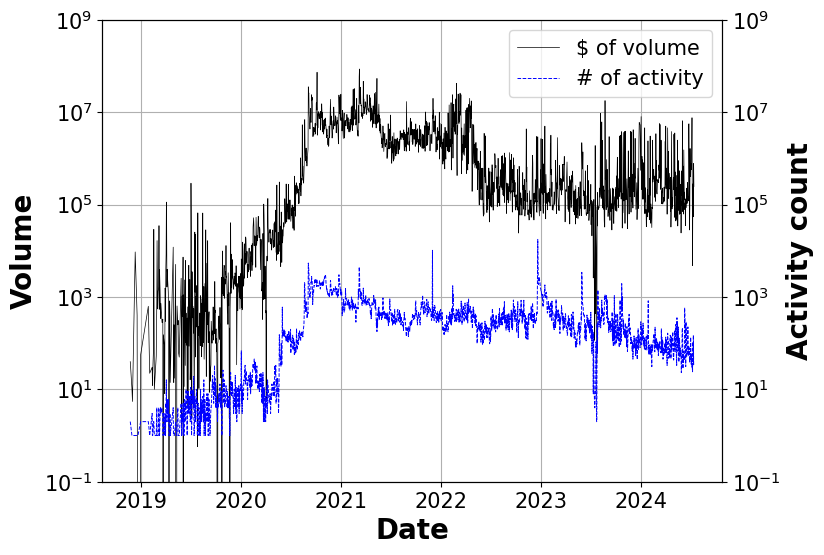

In [315]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting the graph with two lines: volume by day and total activity count by day
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot volume by day (first line)
ax1.plot(df_grouped['date'], df_grouped['volume'], color='black', linewidth=0.5, label='$ of volume')

# Create a second y-axis for activity count
ax2 = ax1.twinx()
ax2.plot(df_grouped['date'], df_grouped['activity_count'], color='blue', label='# of activity',linewidth=0.7, linestyle='--')

# Labeling the axes
ax1.set_xlabel('Date', fontweight='bold', fontsize=20)
ax1.set_ylabel('Volume', fontweight='bold', fontsize=20)
ax2.set_ylabel('Activity count', fontweight='bold', fontsize=20)

ax1.tick_params(axis='both', labelsize=15)  # Adjust for x and y ticks on ax1
ax2.tick_params(axis='y', labelsize=15) 

# Set logarithmic scale for both y-axes
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_ylim(10**-1, 10**9)
ax2.set_ylim(10**-1, 10**9)
# Display legends for both lines
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', prop={'size': 15})
ax1.grid(True, zorder=1)

# Display the plot
plt.show()


# owner action

In [316]:
df_list = []

for outer_index, outer_row in df_token.iterrows():
    pool = outer_row['pool_address']
    owner = outer_row['token_owner']
    utoken= outer_row['token_address']
    vtokenn = outer_row['token_paired_address']
    
    df_liqui = df_liq[df_liq['contract_address'] == pool]
    df_liqui = df_liqui[df_liqui['sender_address'] == owner]
    df_liqui = df_liqui[df_liqui['token_address'] == vtokenn]
    df_liqui = df_liqui[df_liqui['category'].isin(['withdraw', 'sell'])]
    df_liqui.sort_values('timestamp', inplace=True)
    df_liqui['timestamp'] = pd.to_datetime(df_liqui['timestamp'])
    df_liqui['days_from_start'] = (df_liqui['timestamp'] - df_liqui['timestamp'].min()).dt.total_seconds() / (60 * 60 * 24)  # Convert seconds to days
    df_liqui['volume'] = abs(df_liqui['amount_token'] * df_liqui['token_price'])
    df_liqui['days_from_start'] = df_liqui['days_from_start'].astype(int)
    df_list.append(df_liqui)

df_combined = pd.concat(df_list, ignore_index=True)


In [319]:
# Group by 'days_from_start' to get the total sell+withdraw count and total volume for each day
df_grouped = df_combined.groupby('days_from_start').agg({
    'category': 'count',  # Count total sell+withdraw actions
    'volume': 'sum'  # Sum the volume for each day
}).reset_index()
df_grouped

,days_from_start,category,volume
0,0,46008,6.226152e+07
1,1,2726,3.398483e+06
2,2,1825,1.455009e+06
3,3,1221,2.167569e+06
4,4,1158,1.533489e+06
...,...,...,...
819,1371,1,6.806345e+02
820,1372,1,3.725028e+02
821,1376,2,9.942079e+02
822,1379,2,2.040520e+01


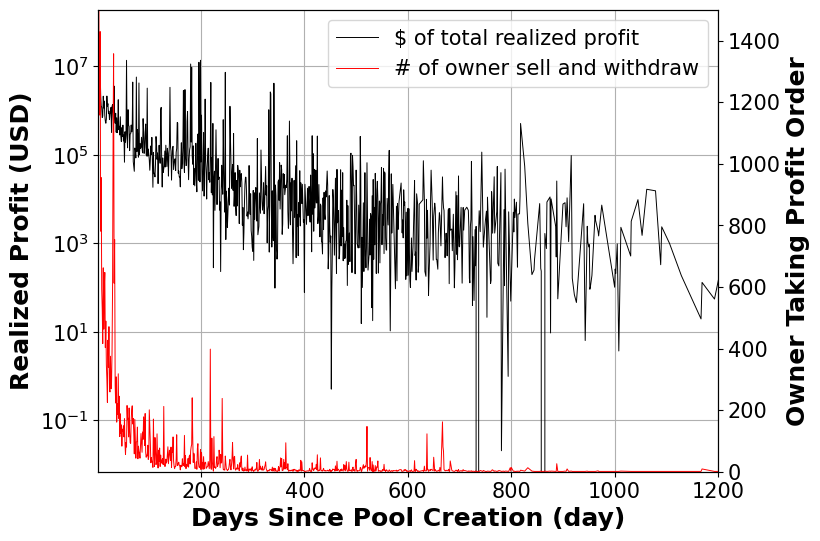

In [321]:
# Plotting the graph with two lines
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot total sell+withdraw (first line) on ax1
ax1.plot(df_grouped['days_from_start'], df_grouped['volume'], label='$ of total realized profit', linewidth=0.7, color='black')

# Create a second y-axis for volume
ax2 = ax1.twinx()
ax2.plot(df_grouped['days_from_start'], df_grouped['category'], label='# of owner sell and withdraw', linewidth=0.7, color='red')

# Labeling the axes
ax1.set_xlabel('Days Since Pool Creation (day)', fontweight='bold', fontsize=18)
ax1.set_ylabel('Realized Profit (USD)', fontweight='bold', fontsize=18)
ax2.set_ylabel('Owner Taking Profit Order', fontweight='bold', fontsize=18)

# Set y-axis colors
ax1.tick_params(axis='y')
ax2.tick_params(axis='y')

ax2.set_xlim(1, 1200)
ax2.set_ylim(0, 1500)
ax1.set_yscale('log')

ax1.tick_params(axis='both', labelsize=15)  # Adjust for x and y ticks on ax1
ax2.tick_params(axis='y', labelsize=15) 


# Display legends for both lines
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', prop={'size': 15})

# Display the grid
ax1.grid(True)

# Show the plot
plt.show()
